Supervised Learning

Definition: Model learns from labeled data (features + target).

Types: Regression (continuous target) vs Classification (categorical target).

Real-world examples:

Predicting house prices



## Linear Regression

y= mx + b

y= hθ x =θ·x

In [16]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

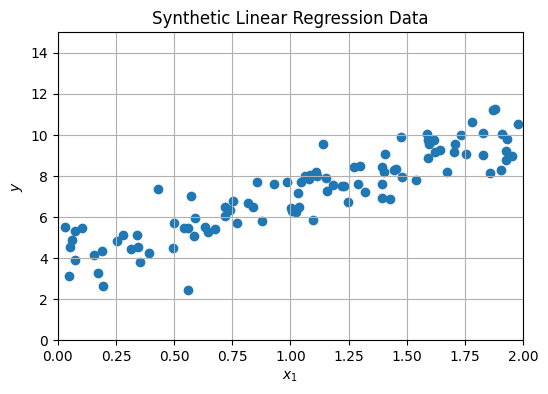

In [21]:
plt.figure(figsize=(6, 4))
plt.scatter(X, y) # <‑‑ each dot is a (x, y) pair
plt.axis([0, 2, 0, 15])
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.title("Synthetic Linear Regression Data")
plt.grid(True)
plt.show()

In [17]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

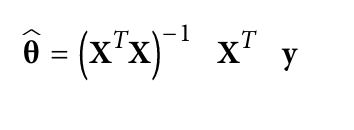

In [28]:
theta_best

array([[3.86501051],
       [3.13916179]])

In [18]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86501051],
       [10.14333409]])

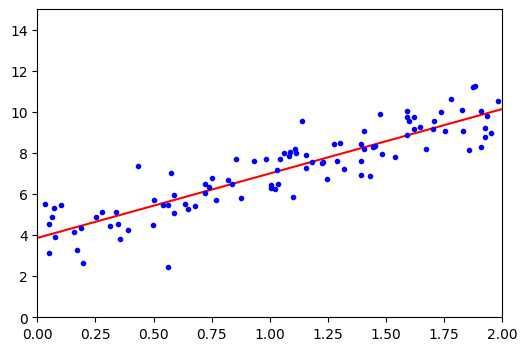

In [22]:
plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression()

In [26]:
lin_reg.intercept_, lin_reg.coef_

(array([3.86501051]), array([[3.13916179]]))

In [24]:
lin_reg.predict(X_new)

array([[ 3.86501051],
       [10.14333409]])

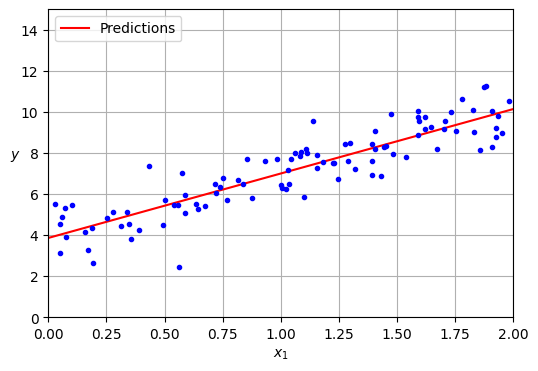

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

##Polynomial Regression

In [29]:
 m = 100
 X = 6 * np.random.rand(m, 1) - 3
 y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

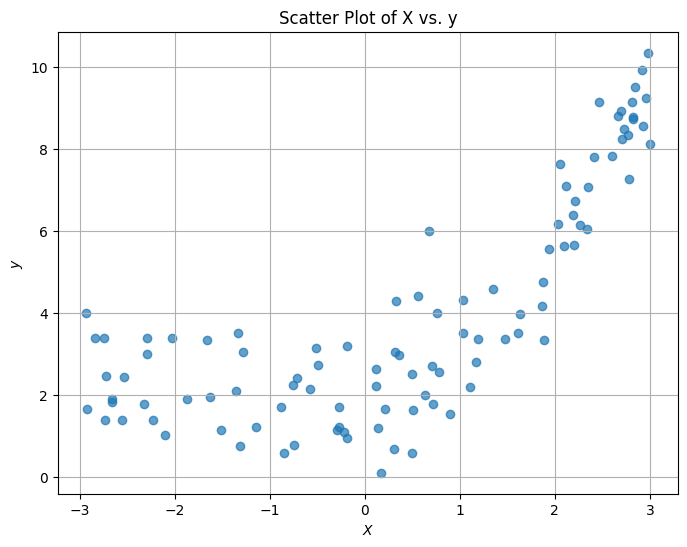

In [31]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7)
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.title('Scatter Plot of X vs. y')
plt.grid(True)

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [40]:
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

In [41]:
y_pred = lin_reg.predict(X_new)

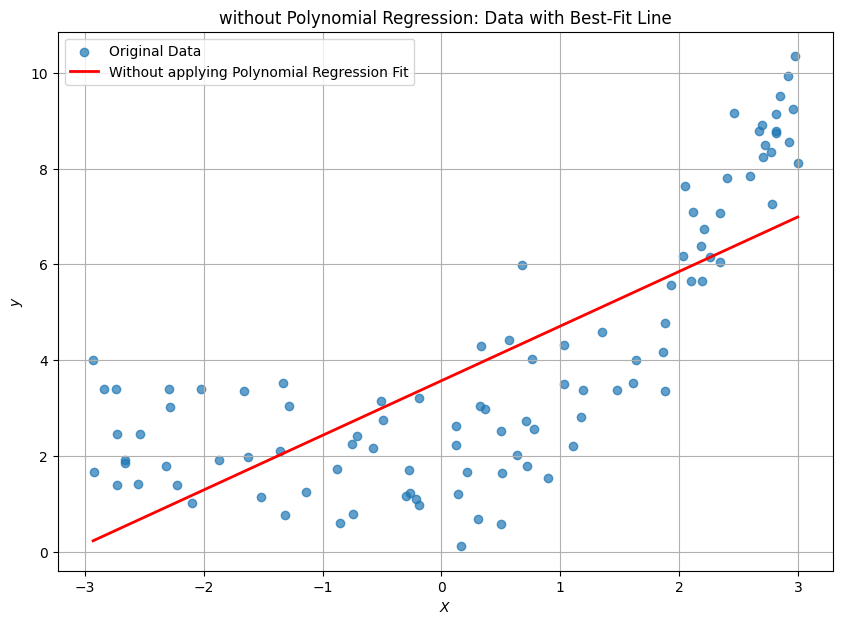

In [44]:
# Create the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X, y, label='Original Data', alpha=0.7)

# Plot the best-fit line
plt.plot(X_new, y_pred, 'r-', linewidth=2, label='Without applying Polynomial Regression Fit')

plt.xlabel('$X$')
plt.ylabel('$y$')
plt.title('without Polynomial Regression: Data with Best-Fit Line')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9326696]), array([[0.99165946, 0.48476612]]))

In [37]:
# 1. Create a range of X values for prediction
# We'll create a smooth range from the minimum to maximum X values in your dataset
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# 2. Transform the new X values using the same PolynomialFeatures object
X_new_poly = poly_features.transform(X_new)

# 3. Predict the y values using your trained linear regression model
y_pred = lin_reg.predict(X_new_poly)

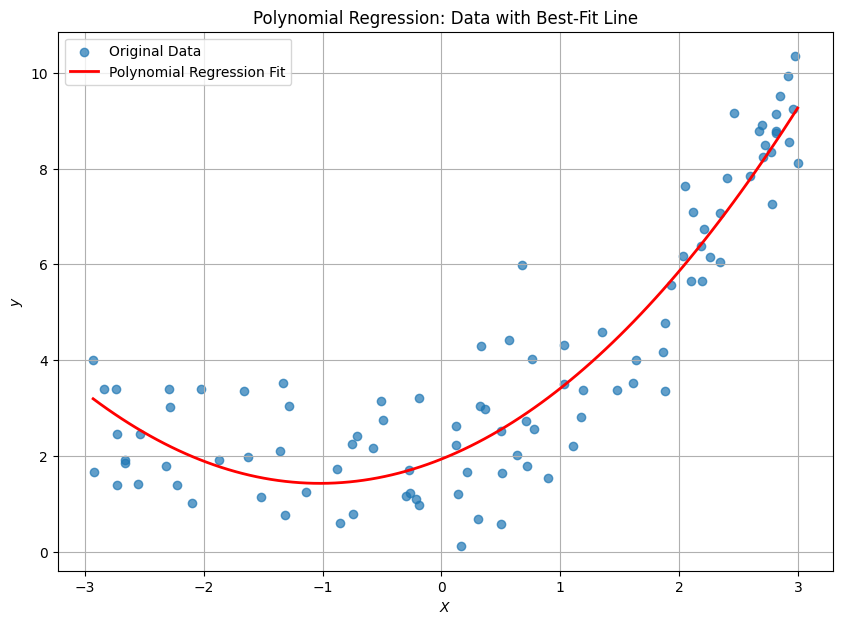

In [38]:
# Create the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X, y, label='Original Data', alpha=0.7)

# Plot the best-fit line
plt.plot(X_new, y_pred, 'r-', linewidth=2, label='Polynomial Regression Fit')

plt.xlabel('$X$')
plt.ylabel('$y$')
plt.title('Polynomial Regression: Data with Best-Fit Line')
plt.legend()
plt.grid(True)
plt.show()

## Metrics

RMSE, MSE and the MAE are ways to measure the distance between two vectors:
 the vector of predictions and the vector of target values.

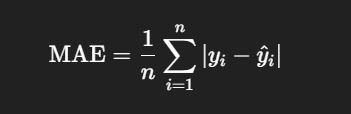

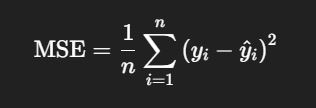

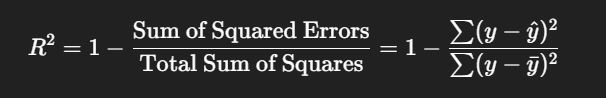

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_true = [100, 200, 300, 400]
y_pred = [110, 190, 310, 390]

print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("R²:", r2_score(y_true, y_pred))


MAE: 10.0
MSE: 100.0
R²: 0.992


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_true = [100, 200, 300, 400]
y_pred = [120, 180, 320, 380]

print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("R²:", r2_score(y_true, y_pred))

MAE: 20.0
MSE: 400.0
R²: 0.968
